# レポート提出について

このレポートでは、下記の講義サポートサイトの第５回講義のセクションから、「東京の気温データ（演習用）」のファイルをダウンロードし、「data.csv」という名前でこのノートのファイルブラウザにアップロードした状態を想定して、解答プログラムを記述するものとする。

> https://sites.google.com/view/tus-programming-2/

このファイルには、1970年から2018年までの東京の月次平均気温・最低気温・最高気温のデータが含まれている。このファイルがプログラムを実行するカレントディレクトリにあると仮定した上で、以下の問いに答えるプログラムを与えよ。

答えとなるプログラムは、それぞれの解答欄のコードセルに入力し、解答記入後のノートを .ipynb ファイルとしてダウンロードして、メール添付で提出するものとする。提出先メールアドレスは下記の通りである。

> kengo-zenitani-tus@academic.mail-box.ne.jp

なお、提出の際、以下に留意すること。

* メールの Subject 欄でどの講義（「プログラミング論２」）のどの回のレポートについての解答提出なのかを明記すること。
* 提出者の学籍番号と氏名が分かるよう下記のフォームに入力すること。
* 各プログラムが100行を超えないようにすること。

提出期限については講義サポートサイトの記載を確認すること。

In [ ]:
#@title 提出者
_学籍番号_ =  8718033#@param {type:"integer"}
_氏名_ =  "\u4E0A\u6751\u57FA\u8A18"#@param {type:"string"}


# 第１問

1970年から2018年にかけて毎年7月の最高気温のランキングを作り、気温の高いもののトップ20を次のような表形式で出力するプログラムを与えよ。正しいプログラムは次の結果を出力する。

In [ ]:
#@title 解答例

Rank Year  Max.Temp
==== ===== ========
   1 2004      39.5
   2 2018      39.0
   3 2001      38.1
   4 1997      37.7
   5 1987      37.3
   6 2016      36.7
   7 2010      36.3
   8 1998      36.1
   9 2006      36.1
  10 1995      35.9
  11 2015      35.8
  12 1975      35.6
  13 1991      35.6
  14 1994      35.6
  15 2005      35.6
  16 2014      35.6
  17 2012      35.4
  18 2013      35.4
  19 2017      35.0
  20 1970      34.9


**注意事項** この問題では数字の桁位置を揃えることが重要である。MacOS環境でChromeを利用しているとフォント表示の関係で桁位置表示が想定通りとならないため、Mac利用者はChromeではなくSafariを使って問題を解くようにせよ。

## 解答欄

In [1]:
import codecs, csv
with codecs.open('data.csv', 'r', 'shift_jis') as fp:
    temperatures = [[int(val) for val in row[0].split('/')] + [float(row[1]), float(row[4]), float(row[7])] for row in list(csv.reader(fp))[6:]]
print("Rank Year  Max.Temp")
print("==== ===== ========")
tu=sorted(temperatures[6::12], key=lambda row: -row[3])
for  i,row in enumerate(tu[:20],1):
  tu.append(i)
  print(f"  {i:2} {row[0]}      {row[3]}")
   

Rank Year  Max.Temp
==== ===== ========
   1 2004      39.5
   2 2018      39.0
   3 2001      38.1
   4 1997      37.7
   5 1987      37.3
   6 2016      36.7
   7 2010      36.3
   8 1998      36.1
   9 2006      36.1
  10 1995      35.9
  11 2015      35.8
  12 1975      35.6
  13 1991      35.6
  14 1994      35.6
  15 2005      35.6
  16 2014      35.6
  17 2012      35.4
  18 2013      35.4
  19 2017      35.0
  20 1970      34.9


# 第２問

1970年から2018年にかけて毎年3月の平均気温のランキングを作り、気温の低いもののトップ10を横向き棒グラフ（barh）で出力するプログラムを与えよ。なお、グラフは以下の条件を満たすものとする。

* グラフ全体のタイトルは “Average temperatures ranking in Tokyo, 1970-2018”。
* X軸の大目盛は５度刻み、小目盛は１度刻み。大目盛線は実線。小目盛線は点線。
* Y軸のラベルは測定年。
* X軸のタイトルは “Average temperature (Celsius)"。Y軸のタイトルはなし。

正しいプログラムは次のグラフを出力する。

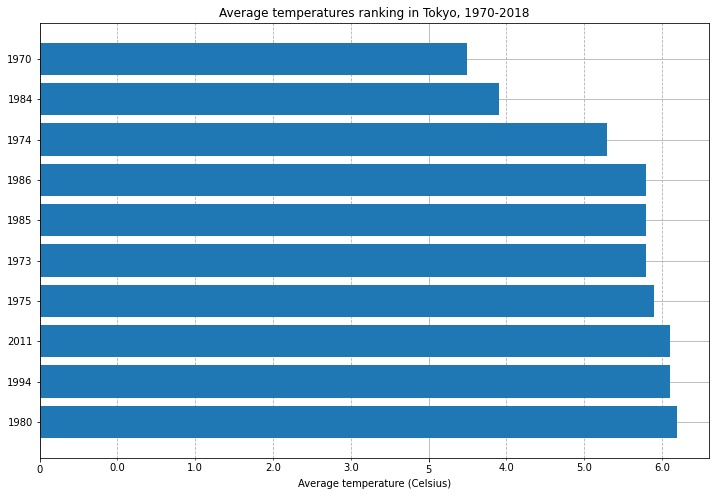

In [ ]:
#@title 解答例

## 解答欄

<BarContainer object of 10 artists>

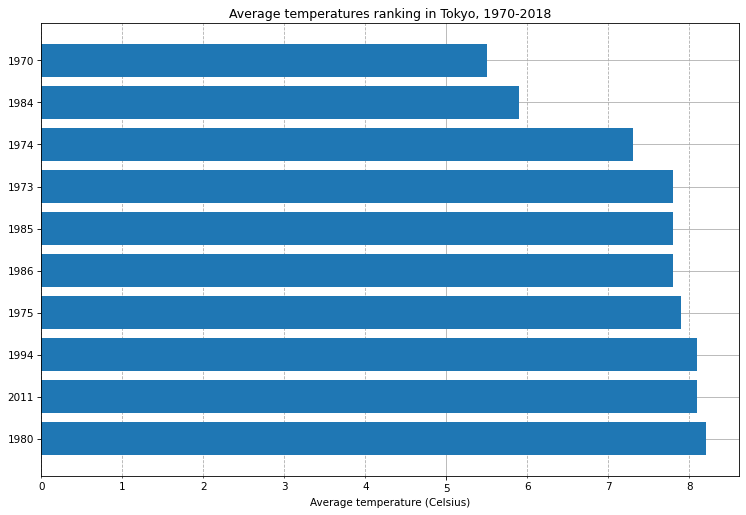

In [17]:
import codecs, csv
with codecs.open('data.csv', 'r', 'shift_jis') as fp:
    temperatures = [[int(val) for val in row[0].split('/')] + [float(row[1]), float(row[4]), float(row[7])] for row in list(csv.reader(fp))[6:]]
t=sorted(temperatures[2::12], key=lambda row: -row[2],reverse=True)
labels = [f"{row[0]}" for row in t[:10]]
values = [row[2] for row in t[:10]]
ys = sorted(list(range(len(labels))),reverse=True)
from matplotlib import pyplot
figure = pyplot.figure(figsize=(12, 8), dpi=75)
axes = figure.add_subplot(1, 1, 1)
axes.set_title("Average temperatures ranking in Tokyo, 1970-2018")
axes.set_xlabel("Average temperature (Celsius)")  
axes.set_xticks([5,10]) 
axes.set_xticks(range(10), minor=True)
axes.set_xticklabels([0,1,2,3,4,6,7,8,9,10],minor=True)  
axes.set_yticks(ys) 
axes.set_yticklabels(labels) 
axes.grid(True, which="major")  
axes.grid(True, which="minor", linestyle="--")  
axes.set_axisbelow(True) 
axes.barh(ys, values)  

# 第３問

1970年1月から1989年12月までの20年分の東京の気温のデータを用い、１月から１２月の各月における20年分の平均気温の折れ線グラフを与えよ。（つまり、折れ線グラフの１月の数値は、過去20年毎年１月の平均気温の平均になる。）また、各月の平均気温の過去20年間における標準偏差を求め、この標準偏差をエラーバーとして折れ線グラフに付加せよ。更に、1990年1月から2018年12月までの29年分の東京の気温のデータを用い、同様の標準偏差に基づくエラーバー付き折れ線グラフを同じ１枚の図にまとめよ。つまり、この問題では１枚のグラフに２系統のエラーバー付き折れ線グラフがまとめられた図を作る。（気候温暖化の影響が出ているかどうかを見るために、1970～1989における平均気温と1990～2018における平均気温の違いを見るためのグラフと考えるとよい。）なお、グラフは以下の条件を満たすものとする。

* グラフ全体のタイトルは “Temperatures in Tokyo, 1970-1989 and 1990-2018”。
* Y軸の大目盛は５度刻み、小目盛は１度刻み。大目盛線は実線。小目盛線は点線。
* Y軸のタイトルは “Average temperature (Celsius)”。X軸のタイトルはなし。
* X軸には３文字で表した１～１２月の英名を並べる。（Jan, Feb, Mar, ...）

正しいプログラムは次の結果を出力する。


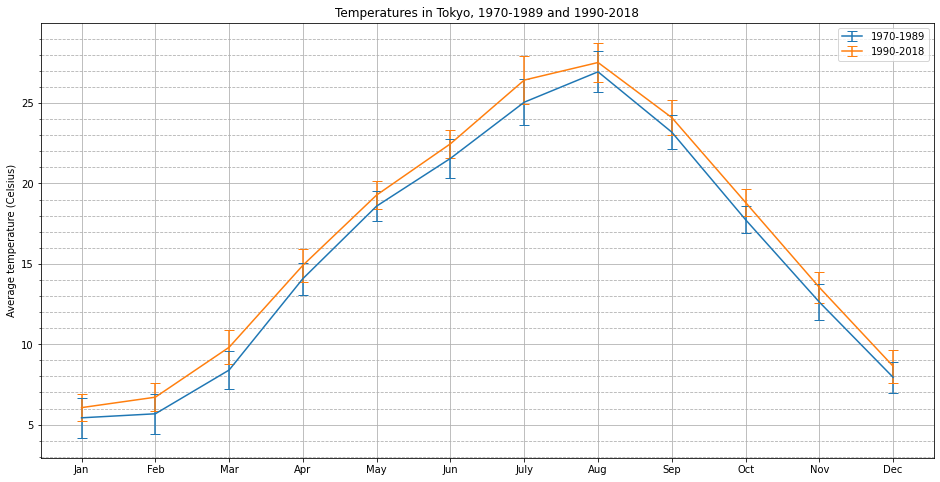

In [ ]:
#@title 解答例

## 解答欄

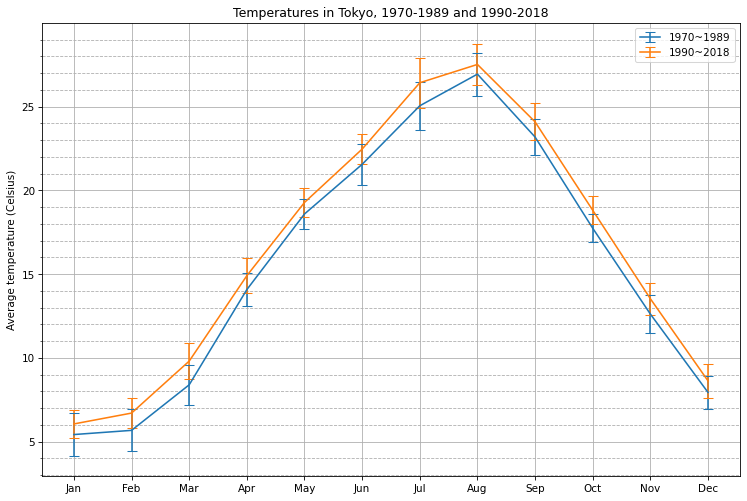

In [18]:
import codecs, csv
with codecs.open('data.csv', 'r', 'shift_jis') as fp:
    temperatures = [[int(val) for val in row[0].split('/')] + [float(row[1]), float(row[4]), float(row[7])] for row in list(csv.reader(fp))[6:]]
from statistics import mean, variance, stdev
result1989=[]
for r in range(12):
  result1989.append([])
  t=temperatures[r:240:12]
  for i in range(len(t)):
    result1989[r].append(t[i][2])
result1990=[]
for r in range(12):
  result1990.append([])
  t1=temperatures[240+r::12]
  for i in range(len(t1)):
    result1990[r].append(t1[i][2])
from matplotlib import pyplot
figure = pyplot.figure(figsize=(12, 8), dpi=75)
axes = figure.add_subplot(1, 1, 1)
x=range(12)
y_1=[]
y_2=[]
yerr1=[]
yerr2=[]
for i in range(len(result1989)):
  y_1.append(mean(result1989[i]))
for i in range(len(result1990)):
  y_2.append(mean(result1990[i]))
for i in range(len(result1989)):
  yerr1.append(stdev(result1989[i]))
for i in range(len(result1990)):
  yerr2.append(stdev(result1990[i]))
axes.set_title("Temperatures in Tokyo, 1970-1989 and 1990-2018")
axes.set_ylabel("Average temperature (Celsius)")
axes.set_xticks(x)
axes.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
axes.set_yticks(list(range(0, 35)), minor=True)
axes.grid(True, which="major")
axes.grid(True, which="minor", linestyle="--")
axes.set_axisbelow(True)
axes.errorbar(x, y_1, yerr=yerr1, capsize=5,label='1970~1989')
axes.errorbar(x, y_2, yerr=yerr2, capsize=5,label='1990~2018')
axes.legend(loc='upper right')

# 第４問

第３問に続いて同じデータを用い、1970年から2018年の各年における通年での最高気温を求め、その値が1970年から2018年にかけて変化する様子を折れ線グラフとして与えよ。なお、グラフは以下の条件を満たすものとする。

* グラフ全体のタイトルは “Temperatures in Tokyo, 1970-2018”。
* Y軸の大目盛は1.0度刻み、小目盛は0.1度刻み。大目盛線は実線。小目盛線は点線。
* Y軸のタイトルは “Average temperature (Celsius)"。X軸のタイトルはなし。
* X軸には５年ごとに目盛を打ち、年を表す文字列を90度回転させて添える。

正しいプログラムは次のグラフを出力する。

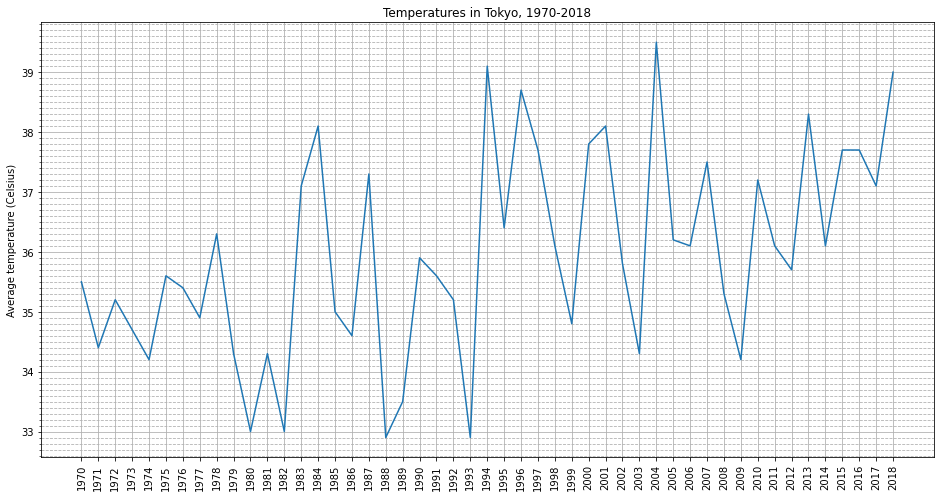

In [ ]:
#@title 解答例

## 解答欄

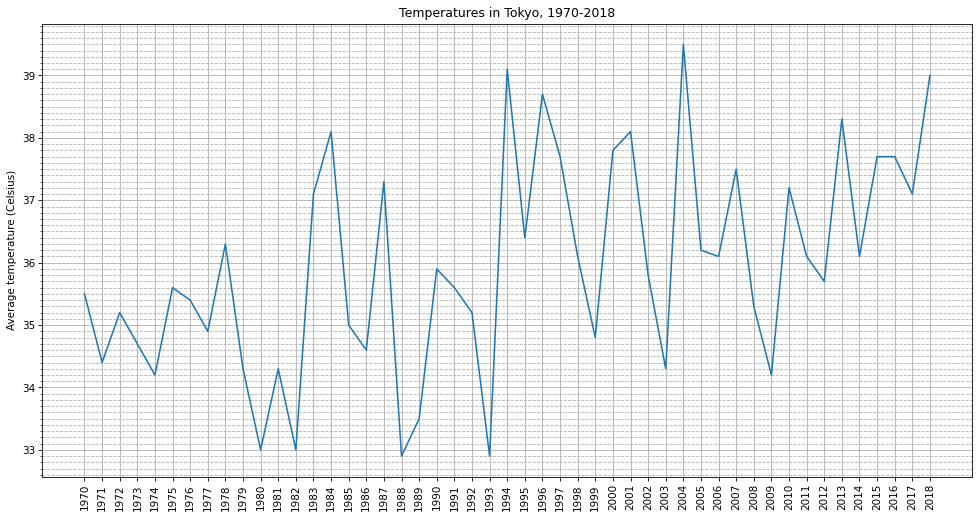

In [21]:
import codecs, csv
with codecs.open('data.csv', 'r', 'shift_jis') as fp:
    temperatures = [[int(val) for val in row[0].split('/')] + [float(row[1]), float(row[4]), float(row[7])] for row in list(csv.reader(fp))[6:]]
result_saikou=[]
for r in range(49):
  result_saikou.append([])
  t1=temperatures[12*r:12*(r+1):]
  for i in range(len(t1)):
    result_saikou[r].append(t1[i][3])
MAX=[]
for i in  result_saikou:
  MAX.append(max(i))
from matplotlib import pyplot
figure = pyplot.figure(figsize=(16, 8), dpi=75)
axes = figure.add_subplot(1, 1, 1)
axes.set_title("Temperatures in Tokyo, 1970-2018")
axes.set_ylabel("Average temperature (Celsius)")
axes.set_xticks(range(len(MAX)))
labelss=range(1970,2019)
ylabel = [i for i in range(int(max(MAX))+1)]
axes.set_yticks(ylabel)
axes.set_xticklabels(labelss)
yticks = [i/10 for i in range(0,(int(max(MAX))+1)*10+1)]
axes.set_yticks(yticks, minor=True)
axes.grid(True, which="major")
axes.grid(True, which="minor", linestyle="--")
axes.set_axisbelow(True)
axes.set_xticklabels(labelss, rotation=90) 
axes.plot(range(len(MAX)),MAX)